In [2]:
import collections
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [3]:
# Read input file, note the encoding is specified here 

# file = open('Data/Bordeaux_Reds_Descriptions_Stripped.csv', encoding="utf8")
# file = open('Data/Bordeaux_Reds_over_90_Points_Stripped.csv', encoding="utf8")
file = open('Data/Bordeaux_Reds_under_90_Points_Stripped.csv', encoding="utf8")

a = file.read()


In [4]:
# Stopwords
stopwords = set(line.strip() for line in open('Data/Common_Words_Stop.csv'))
stopwords = stopwords.union(set(['the','and', 'of', 'a', 'is','with','this','to','on','but','that','all','now','has',
                                'in','drink','more','through','an','by','until','its','about','are','be','it',
                                'have','while','both','while','wine','from','as','for','at','there','give',
                                 "it's",'age','some','years','still','also','very','tannins','fruit','acidity',
                                 'fruits','will','well','notes','aromas','flavors','shows', 'aftertaste',
                                 'finish','so','out','just','core','vintage','just','palate','not','needs','vines',
                                 'wood','aging','character','texture','blend','character','over','hints','finish',
                                 '2020','2019','2018','2017','2016','2015','2003','2025','&','2024','2010','2026',
                                 'merlot','although','should','comes','vineyard','property','owned','under','second',
                                 'cabernet','or','end','up','into','gives','along','offers','which','plenty',
                                 'mouth','made','one','showing','grenache','produced','nose','syrah','touch',
                                 'flavor','wines','come','much','than','giving','next','yet','year','2021','2022',
                                 'show','right','here','almost','does','certainly','hint','bit','few','sauvignon',
                                 'stage','likely','de','months','too','color','same','two','then','could','even',
                                 'feel',"that's","there's",'2023','grapes','make','franc','seems','go','style','many',
                                 'together','between','small','sense','going','saint-émilion','several','appellation',
                                 'need',"don't",'was','vineyards','pauillac','saint-estéphe','five','part','given',
                                 'brings','after','saint-julien','4-5','since','side','team','ownership','touches',
                                 'bringing','parcel','médoc','relatively','century','way','diageo','these','typical',
                                 'proerties','further','haut-médoc','chateau','family','already','bordeaux','margaux',
                                 'before','least','chateau','estates','they','close','best','quickly','imported',
                                 'final','keep','coming','open','barrel','properties','present','only','saint-emilion',
                                 'elements','been','most','la','however','3-4','background',"wine's",'always','southern',
                                 '2027','take','selection','acres','moment','element','worth','petit',
                                 'better','surrounded','winemaking','behind','verdot','makes','little','2025','estate',
                                 'allow','first','obviously','set','support','cushioned','add','amount','having',
                                 'back','extra','their','consultant','merlot-dominated','offering','like','initially',
                                 'never','what','term','performing','become','100%','such','parcels','can','underneath',
                                 'sample','plateau','develops','who','10','enough','mark','château','from','easily',
                                 'proportion','producing','léoville','growth','drinking','result','despite',
                                 'down','heart','produces','point','finishing','drunk','lightly','no','skin','classé',
                                 'bourgeois','named','situated','90%','70%','growths','time','dominated','finely',
                                 'edge','soften','slowly','dominate','success','adds','ages','alcohol','form',
                                 '2000','combination','those','when','bring','taste','within','place','bodied',
                                 'pomerol','above','owner','owners','lurton','four','last','backed','because',
                                 'development','red','white','high','cru','medium-term','drinkable','produce',
                                 'supported','mix','tough','grown','surface','line','though','begining','based',
                                 'opens','another','continues','malbec','north','note','east','river','supporting',
                                 'own','vintages','rather','you','without','outside','2012','feels','signs',
                                 'michael','front','30%','5-6','barrels','equal','planted','immediately','haut-brion',
                                 'let','losing','shape','2001','suggests','keeping','juice','west','if','evident',
                                 'created','20%','maturity','michel','castle','large','fill','equally','effort',
                                 '60%','80%','french','skins','counterpoint','often','leaaving','quite','life',
                                 'manages',"doesn't",'bottling','allowing','leaving','everything','combine','shine',
                                 'filled','rolland','12','fast','push','name','six','cuvée',"family's",'2-3',
                                 'entre-deux-mers','region','suggest','followed','room','cut','being','around',
                                 'food','away','perhaps','flavored','tastes','shot','bourg','less','hinting',
                                 'plus','needing','northern','laced','blaye','missing','finishes','means','really',
                                 'use','currently','any','2014','do','off','making','other','classed','late',
                                 'remain','probably','early','fully','may','10%','backdrop','leaves','reveal',
                                 'initial','maybe','leaves','listrac','suggesting','offer','gironde','keeps',
                                 'cuts','influence','2009','features','run','edges','whose','starting','leave',
                                 'branded','owns','label','garonne','village','lies','aroma','three','slopes',
                                 'carreau','bottle','alongside','chance','secondary','group','promises',
                                 'would','feeling','find','itself','mask','reflect','25%','alliance','becoming',
                                 'left','added','streak','provide','taking','barton','south','mainly','work',
                                 'estuary','goes','reveals','somewhat','adding','city','2007','merlot/cabernet',
                                 'apparent','generation','start','15%','allied','main','dating','definitely',
                                 'how','dordogne','once','where','act','takes','producer','bernard','sustain',
                                 '2011','glass','lends','beneath','get','eastern','slight','otherwise','series',
                                 'holds','reflects','2004','soil','against','vignobles','denis','play','75%',
                                 'managed','opening','kept','cabernets','selected','resulting','foursquare',
                                 'indicate','chateaus','40%','50%','touched','seem',"year's",'castillon',
                                 'center','neighboring','boasts','sight','his','bought','winery','indicates',
                                 'partner','usual','lynch-bages','crus','seven-acre','tones','domaines',
                                 'rothschild','retain','cazes','dubourdieu','5-10','las','cases','cheval',
                                 '45%','combines','figeac','cos','built','surely','stars','percentage','slope',
                                 'reflecting','dominique','located','door','colored','moulis','moated','despagne',
                                 'moueix','2028'
                                 
                                 
                                 
                                 
                                ]))


In [5]:
# Instantiate a dictionary, and for every word in the file, 
# Add to the dictionary if it doesn't exist. If it does, increase the count.
wordcount = {}
# To eliminate duplicates, remember to split by punctuation, and use case demiliters.
for word in a.lower().split():
    word = word.replace(".","")
    word = word.replace(",","")
    word = word.replace(":","")
    word = word.replace("\"","")
    word = word.replace("!","")
    word = word.replace("*","")
    if word not in stopwords:
        if word not in wordcount:
            wordcount[word] = 1
        else:
            wordcount[word] += 1


In [6]:
# Print most common word
n_print = int(input("How many most common words to print: "))
print("\nCheers! The {} most common words are as follows\n".format(n_print))
word_counter = collections.Counter(wordcount)
for word, count in word_counter.most_common(n_print):
    print(word, ": ", count)

    

How many most common words to print: 250

Cheers! The 250 most common words are as follows

ripe :  1268
black :  1025
juicy :  869
firm :  798
dry :  712
rich :  681
structure :  649
fruity :  646
berry :  489
soft :  482
fresh :  464
currant :  451
ready :  438
structured :  433
attractive :  433
full :  426
spice :  366
dense :  365
fruitiness :  356
blackberry :  345
balanced :  337
good :  330
light :  318
smoky :  302
solid :  279
dark :  278
black-currant :  274
tannic :  269
fine :  249
young :  244
potential :  239
generous :  229
weight :  227
balance :  215
bright :  214
develop :  206
crisp :  202
spicy :  197
concentrated :  185
smooth :  179
richness :  157
plum :  155
perfumed :  144
stalky :  142
developing :  141
bitter :  141
packed :  135
tight :  127
toast :  119
freshness :  116
great :  115
new :  113
hard :  113
sweet :  112
lean :  107
chocolate :  107
wait :  105
red-berry :  101
big :  101
powerful :  99
delicious :  95
layers :  94
strong :  93
future :  92
r

In [40]:
# Close the file
file.close()


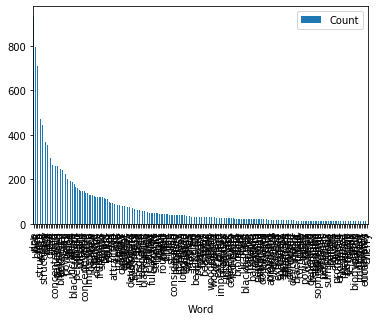

In [41]:
# Create a data frame of the most common words 
# Draw a bar chart
lst = word_counter.most_common(n_print)
df = pd.DataFrame(lst, columns = ['Word', 'Count'])
df.plot.bar(x='Word',y='Count')